<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/survival_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Survival Analysis in Python
Survival Analysis is a statistical method used to analyze the expected duration of time until an event occurs. It is commonly used in medical studies, customer churn prediction, risk modeling, and equipment failure analysis.

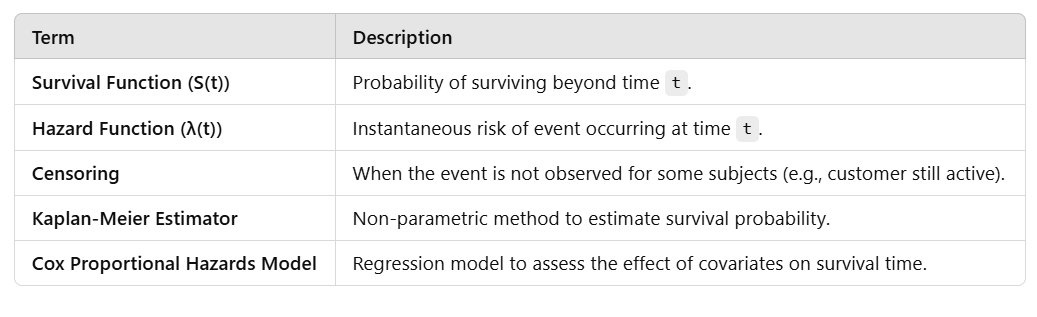

In [1]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 7.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=74ad9b59adac77826203b4b4e35470c1bd4cd611c4bdba673b4c955cfc10b0c7
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter

In [3]:
# Simulated dataset
np.random.seed(42)
df = pd.DataFrame({
    "duration": np.random.randint(5, 50, size=100),  # Time until event/censoring
    "event": np.random.choice([1, 0], size=100, p=[0.7, 0.3]),  # 1 = event, 0 = censored
    "age": np.random.randint(25, 70, size=100),  # Age of subject
    "group": np.random.choice(["treatment", "control"], size=100)  # Group type
})

print(df.head())

   duration  event  age      group
0        43      0   31  treatment
1        33      0   65  treatment
2        19      1   57    control
3        47      0   64  treatment
4        12      1   63    control


In [9]:
df['group_code'] = df['group'].map({'treatment': 1, 'control': 0})
df.drop('group', axis=1, inplace=True)
df.rename(columns={'group_code': 'group'}, inplace=True)
print(df.head())

   duration  event  age  group
0        43      0   31      1
1        33      0   65      1
2        19      1   57      0
3        47      0   64      1
4        12      1   63      0


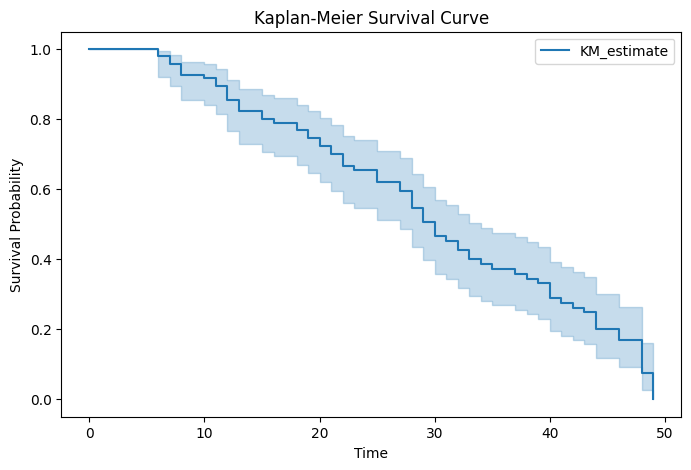

In [4]:
kmf = KaplanMeierFitter()
kmf.fit(df["duration"], event_observed=df["event"])

# Plot Survival Function
plt.figure(figsize=(8, 5))
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.show()


Interpretation:
The curve shows the probability of survival at different time points.
A steep drop means a high risk of failure at that time.


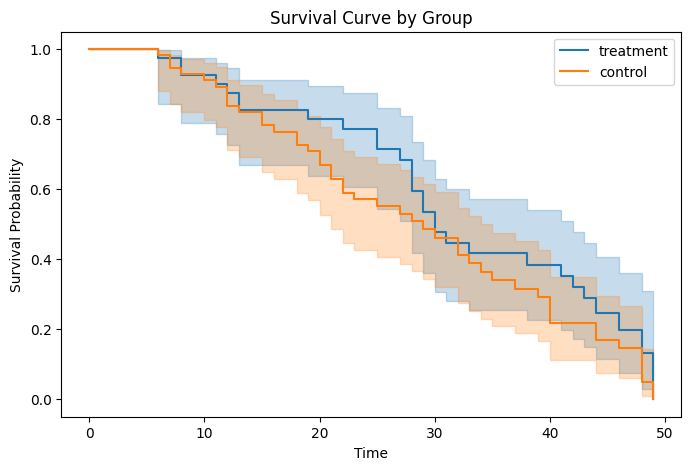

In [5]:
plt.figure(figsize=(8, 5))

for group in df["group"].unique():
    kmf.fit(df["duration"][df["group"] == group], event_observed=df["event"][df["group"] == group])
    kmf.plot_survival_function(label=group)

plt.title("Survival Curve by Group")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

Interpretation:
If the treatment group has a higher survival curve than the control group, the treatment is effective.
The difference can be statistically tested using the log-rank test.

In [10]:
cph = CoxPHFitter()
cph.fit(df, duration_col="duration", event_col="event")

# Print coefficients (hazard ratios)
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 100 total observations, 24 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 100
number of events observed = 76
   partial log-likelihood = -271.96
         time fit was run = 2025-02-19 01:40:34 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age       -0.01      0.99      0.01           -0.03            0.01                0.98                1.01
group     -0.29      0.75      0.24           -0.76            0.17                0.47                1.19

           cmp to     z    p  -log2(p)
covariate                             
age          0.00 -0.72 0.47      1.09
group        0.00 -1.23 0.22      2.20
---
Concordance = 0.54
Partial AIC = 547.92
log-likelihood ratio test = 1.89 on 2 df
-log2(p) of ll-ratio test = 1.36

Key Results:

p-value: If < 0.05, the variable is statistically significant.
Hazard Ratio (HR):
HR > 1 → Increases the risk (shortens survival).
HR < 1 → Decreases the risk (extends survival).

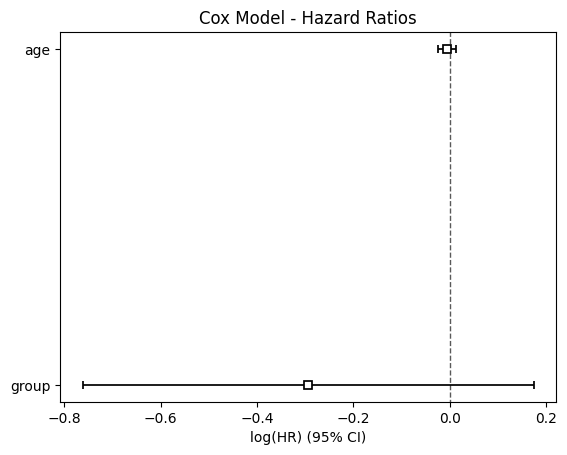

In [11]:
cph.plot()
plt.title("Cox Model - Hazard Ratios")
plt.show()


Interpretation:
Positive coefficients increase risk.
Negative coefficients are protective.